# Samarth M R - @DevIncept_ML

# Exploratory Data Analysis (EDA)

## Introduction

### In this notebook, I have done the Exploratory Data Analysis of the famous Iris dataset and tried to predict the optimum number of clustersand represent it visually using Unsupervised Machine Learning techniques.

#### The features present in the dataset are:

* Sepal Width
* Sepal Length
* Petal Width
* Petal Length

### Importing the necessary libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pickle
import os
%matplotlib inline

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

### Import the dataset and study its features

In [2]:
df = pd.read_csv('D:/DevIncept/Assignment-1/IRIS.csv')
print("Dataset has been loaded")

Dataset has been loaded


In [3]:
## Let us check for duplicate data and check if any value is null
df= df.drop_duplicates()
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
df.shape  ## Provides the dimensions of the data

(147, 5)

In [5]:
df.head()  ## Print the first five rows of data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.describe()  ## Provides the statistics of data

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Determining the value of K

In [7]:
# Finding the optimum number of clusters for k-means classification

X = iris_df.iloc[:, :]

### Performing standardization of the dataset

In [8]:
sc=StandardScaler()
X_std=sc.fit_transform(X)
X_std=pd.DataFrame(X_std)
X_std.columns=X.columns

In [9]:
X_std

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


So, to obtain k-means clustering, standardization must be performed before training the algorithm.

### Determining the value of K using elbow method

In [10]:
from sklearn.cluster import KMeans

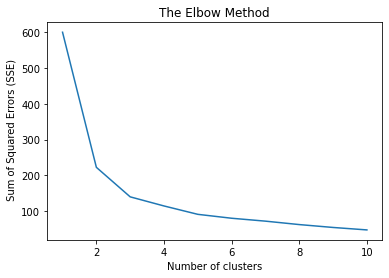

In [11]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X_std)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel(' Sum of Squared Errors (SSE)')
plt.show()

From the elbow method, we can see that the number of optimal clusters is 3.

We can visualize the elbow as a bending line at k = 3

### Training the algorithm and fitting the dataset

Creating the k-means classifier

In [12]:
km=KMeans(n_clusters=3,max_iter=100,init='k-means++')

### FITTING Model Prediction - With Standardization

In [13]:
y_kmeans=km.fit_predict(X_std)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### FITTING Model Prediction - Without Standardization

In [14]:
km1=KMeans(n_clusters=3,max_iter=100,init='k-means++')
y_kmeans1=km1.fit_predict(X)
y_kmeans1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

### Visualize the clusters

Without Standardising features

<function matplotlib.pyplot.show(close=None, block=None)>

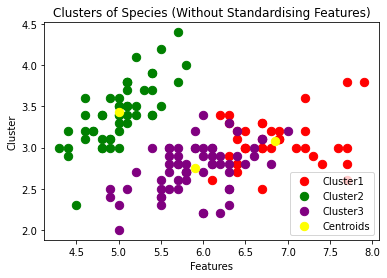

In [15]:
plt.scatter(X.iloc[y_kmeans1==0,0],X.iloc[y_kmeans1==0,1],s=70,c='Red',label='Cluster1')
plt.scatter(X.iloc[y_kmeans1==1,0],X.iloc[y_kmeans1==1,1],s=70,c='green',label='Cluster2')
plt.scatter(X.iloc[y_kmeans1==2,0],X.iloc[y_kmeans1==2,1],s=70,c='purple',label='Cluster3')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],s=70,c='yellow',label='Centroids')

plt.title('Clusters of Species (Without Standardising Features)')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.legend()
plt.show

With standardising features

<function matplotlib.pyplot.show(close=None, block=None)>

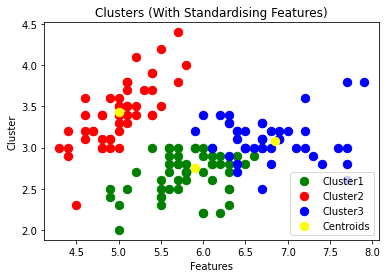

In [16]:
plt.scatter(X.iloc[y_kmeans==0,0],X.iloc[y_kmeans==0, 1],s=70,c='green',label='Cluster1')
plt.scatter(X.iloc[y_kmeans==1,0],X.iloc[y_kmeans==1, 1],s=70,c='red',label='Cluster2')
plt.scatter(X.iloc[y_kmeans==2,0],X.iloc[y_kmeans== 2,1],s=70,c='blue',label='Cluster3')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1], s=70,c='yellow',label='Centroids')

plt.title('Clusters (With Standardising Features)')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.legend()
plt.show

## Conclusion:

### Clearly Cluster 2 and Cluster 3 are more accurate in the standardized training model.



# THANK YOU !!